<a href="https://colab.research.google.com/github/Maria-Ul/Advanced-ML/blob/main/Module_2_Individual_task_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/94_16.csv', header = None)
data

Центрируем данные, чтобы они соответсвовали PCA в sklearn. Из документации к PCA:
'Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. **The input data is centered but not scaled for each feature before applying the SVD**.'

In [ ]:
data_centred = data
for i in range(len(data.columns)):
  data_centred[i] = data[i] - data[i].mean()

Проверяем, что среднее равно нулю

In [ ]:
for i in range(len(data.columns)):
  print(data_centred[i].mean())

2.1279274638648835e-16
3.2566542055671256e-16
3.552713678800501e-16
-4.736951571734001e-16
2.3684757858670006e-16
-2.3684757858670006e-16
1.4062824978585316e-16
-3.552713678800501e-16
-2.960594732333751e-17
2.9605947323337506e-16


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

переименовываем в соотвествии с лекциями

In [ ]:
F = np.array(data_centred)

In [ ]:
pca = PCA(n_components=2, svd_solver='full')

In [ ]:
pca.fit(F)

PCA(n_components=2, svd_solver='full')

Матрица fi собственных векторов, отсортированная по величине собственных значений
В соотсветсвии с лекциями - транспонированная Ф

In [ ]:
fi = (pca.components_)

In [ ]:

fi.shape

(2, 10)

In [ ]:
fi1 = fi[0]

проверим что векторы нормированы

In [ ]:
for fi1 in fi:
  s = 0
  for val in fi1:
    s+=val**2
  print(s)


0.9999999999999992
0.9999999999999998


а еще они должны быть ортогональны друг другу, например для соседних скалярные произведения почти равны нулю:

In [ ]:
for i in range(len(fi)-1):
  print(np.dot(fi[i],fi[i+1]))


8.326672684688674e-17


В соответствии с лекциями вычислим Z

Z - счеты

In [ ]:
Z = np.matmul(F, fi.transpose())

In [ ]:
Z.shape

(60, 2)

In [ ]:
import matplotlib.pyplot as plt


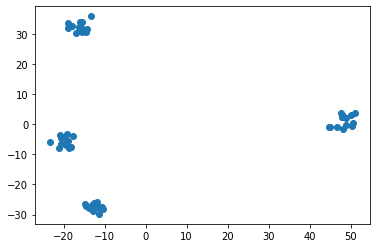

In [ ]:
plt.plot(Z[:,0], Z[:,1], linewidth =0, marker = 'o')

Первый объект, относиельно первой главной компоненты

In [ ]:
round(Z[0][0],3)

-19.058

Первый объект, относительно второй главной компоненты

In [ ]:
round(Z[0][1],3)

31.913

In [ ]:
pca2 = PCA(n_components=2, svd_solver='full')

In [ ]:
pca2.fit(F)

PCA(n_components=2, svd_solver='full')

In [ ]:
round(sum(pca2.explained_variance_ratio_),3)

0.781

In [ ]:
pca2.explained_variance_ratio_

array([0.49224676, 0.28867288])

In [ ]:
pca.explained_variance_ratio_

array([0.49224676, 0.28867288, 0.2101684 , 0.00206508, 0.00175312,
       0.00145155, 0.00118977, 0.00109985, 0.00084595, 0.00050665])

In [ ]:
sum(pca.explained_variance_ratio_[0:3])

0.9910880386611796

Задание 2

In [ ]:
from google.colab.patches import cv2_imshow


In [ ]:
Z = pd.read_csv("/content/X_reduced_681.csv", delimiter = ';', header = None)
fi = pd.read_csv('/content/X_loadings_681.csv', delimiter = ';', header = None)

In [ ]:
np.matmul(fi, fi.transpose())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.172744e-33,-2.123625e-33,1.959277e-34,4.022549e-34,1.294347e-34,-5.307669e-33,2.260421e-34,-2.330744e-33,1.295534e-33,-1.158434e-33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.123625e-33,2.276218e-31,2.249877e-32,2.926812e-32,4.718528e-33,1.136840e-31,-3.579220e-32,4.848830e-32,-3.227136e-32,1.847087e-32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.959277e-34,2.249877e-32,2.083284e-31,-2.107690e-32,9.509279e-33,-1.112225e-32,-1.588892e-33,1.023150e-32,-1.044817e-32,4.887047e-32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.022549e-34,2.926812e-32,-2.107690e-32,2.566302e-32,3.755563e-33,1.598522e-32,3.659267e-33,9.918539e-33,-4.044453e-33,2.118523e-33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.294347e-34,4.718528e-33,9.509279e-33,3.755563e-33,7.125941e-33,0.000000e+00,1.771856e-32,1.925930e-33,-1.155558e-33,5.777790e-34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
F = (Z*fi.transpose())

In [ ]:
F = np.dot(Z, fi.transpose())

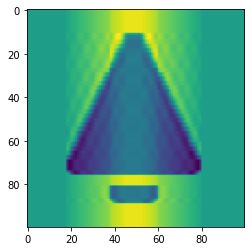

In [ ]:
plt.imshow(F)

In [ ]:
F.shape

(100, 100)

In [ ]:
F.fillna(0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,6.301110e-15,-2.415168e-14,-0.000000e+00,0.0,0.000000e+00,-0.000000e+00,0.000000e+00,0.0,-0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.310384e-15,4.830336e-14,-6.110780e-15,0.0,0.000000e+00,-0.000000e+00,0.000000e+00,0.0,-0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-6.329486e-15,-9.056879e-15,-9.166170e-15,-0.0,-0.000000e+00,0.000000e+00,2.442297e-17,-0.0,0.000000e+00,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.622598e-15,-6.037920e-15,-9.166170e-15,0.0,1.250268e-15,-0.000000e+00,3.907675e-16,0.0,-0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.791870e-15,-2.264220e-14,7.638475e-16,0.0,-1.250268e-15,-8.905725e-17,-1.563070e-15,0.0,-1.906817e-17,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


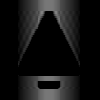

In [ ]:
cv2_imshow((F))